In [ ]:
# Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Disscussion and Collection

In [ ]:
df_train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [ ]:
# Shape of data
print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Stastical Summary of Continous data
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- In above summary feature `Credit_History` only contain `0` and `1`,  so we need to change its type

In [ ]:
# print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


- we can see there is some values are missing in both object and float64 datatype.

# Data Preprocessing

In [ ]:
# Statical summary of categorical Data
df_train['Credit_History'] = df_train['Credit_History'].astype('O')
df_train.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002990,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [ ]:
# Checking for duplicate values
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [ ]:
## Checking for null values
print(df_train.isnull().sum())
# print(df_test.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


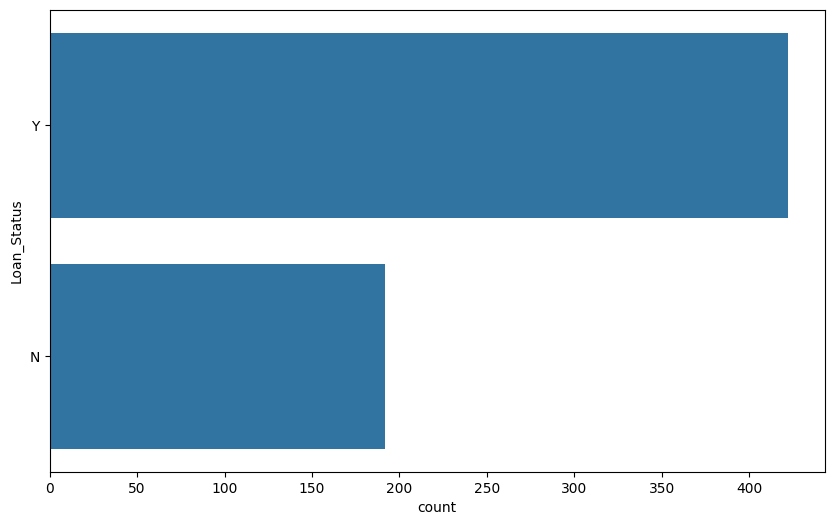

The weight of Y class : 68.73
The weight of N class : 31.27


In [ ]:
## Let's analyze our traget feature
plt.figure(figsize=(10,6))
sns.countplot(df_train['Loan_Status'])
plt.show()

print("The weight of Y class : %.2f" % (df_train['Loan_Status'].value_counts()[0] / len(df_train)*100))
print("The weight of N class : %.2f" % (df_train['Loan_Status'].value_counts()[1] / len(df_train)*100))

Bivariate Analysis

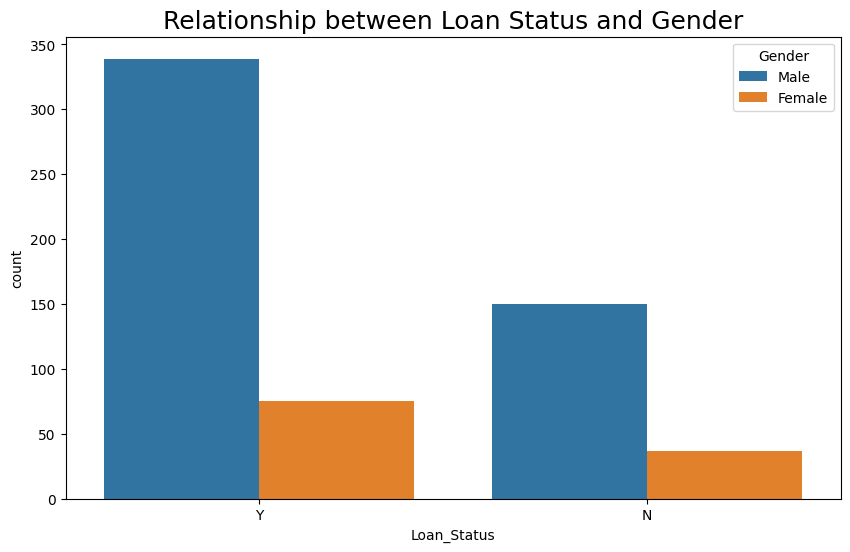

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Loan_Status',hue='Gender',data=df_train)
plt.title("Relationship between Loan Status and Gender",fontsize=18)
plt.show()

#### Observation
- Most males got the more loans in comparision to females

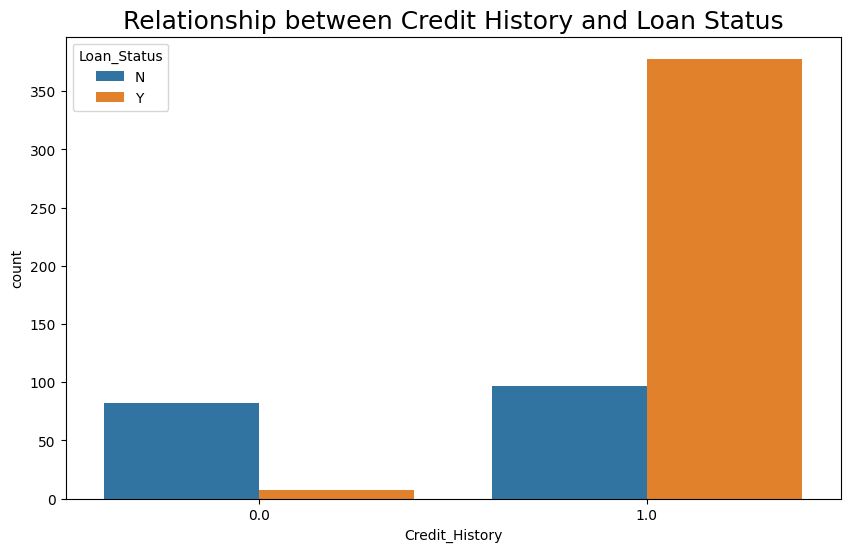

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df_train)
plt.title("Relationship between Credit History and Loan Status",fontsize=18)
plt.show()

#### Observation
- The more clear Credit History(1) more chance to get loan
- Not approving loan with credit history(0)

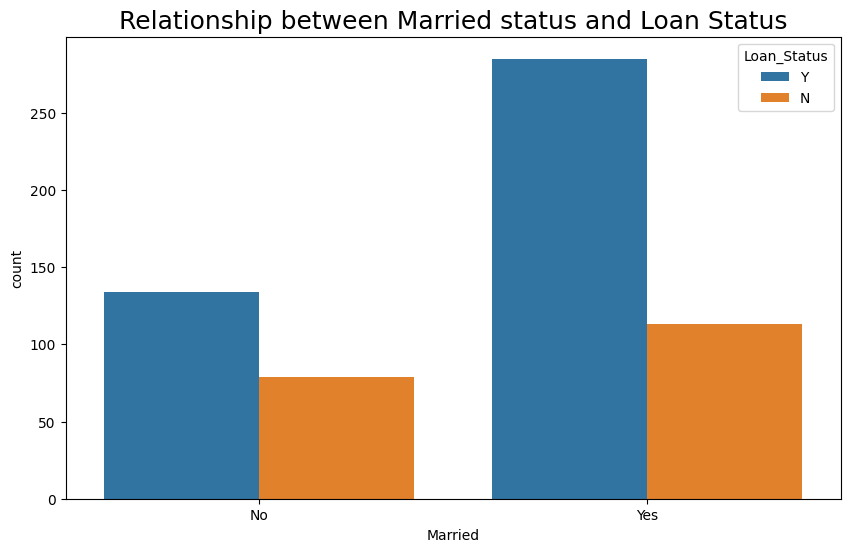

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Married',hue='Loan_Status',data=df_train)
plt.title("Relationship between Married status and Loan Status",fontsize=18)
plt.show()

#### Observation
- Married people have better chance to get loan

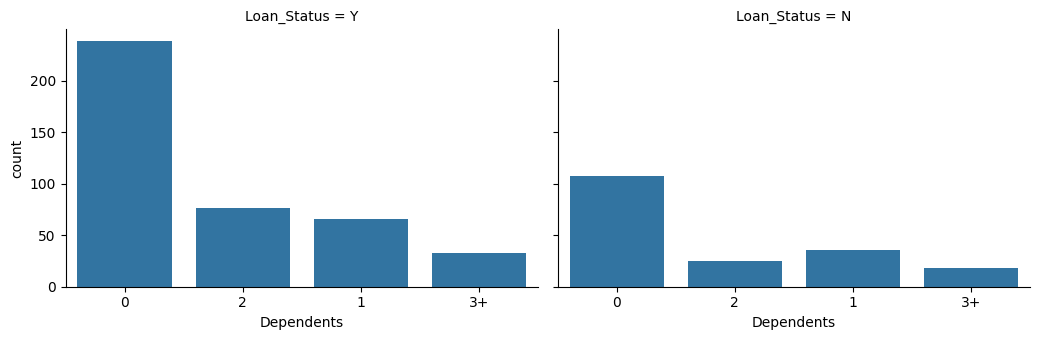

In [ ]:
grid = sns.FacetGrid(data=df_train, col="Loan_Status", height=3.5, aspect=1.5)

grid.map_dataframe(sns.countplot, x="Dependents")

plt.show()


#### Observation
- Dependents with 1 have more chances to get loan

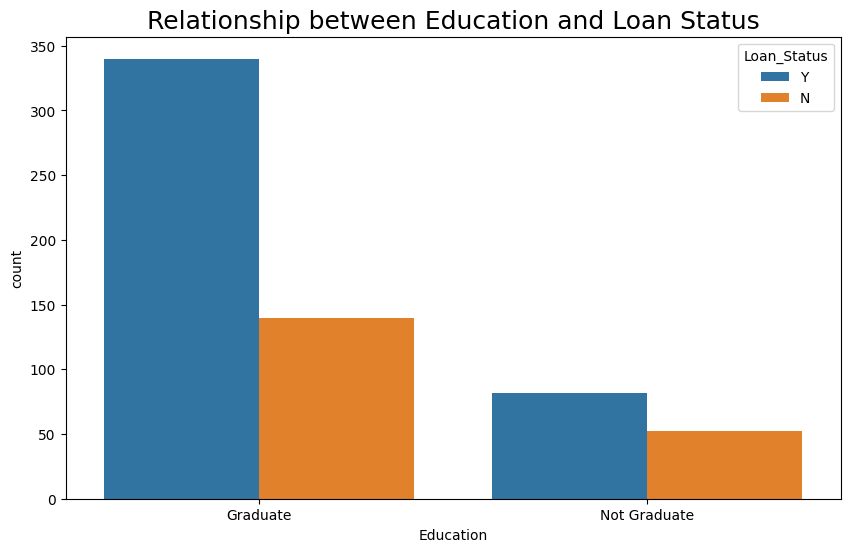

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education',hue='Loan_Status',data=df_train)
plt.title("Relationship between Education and Loan Status",fontsize=18)
plt.show()


#### Observation
- From above plot Graduate's have better chance of getting a loan

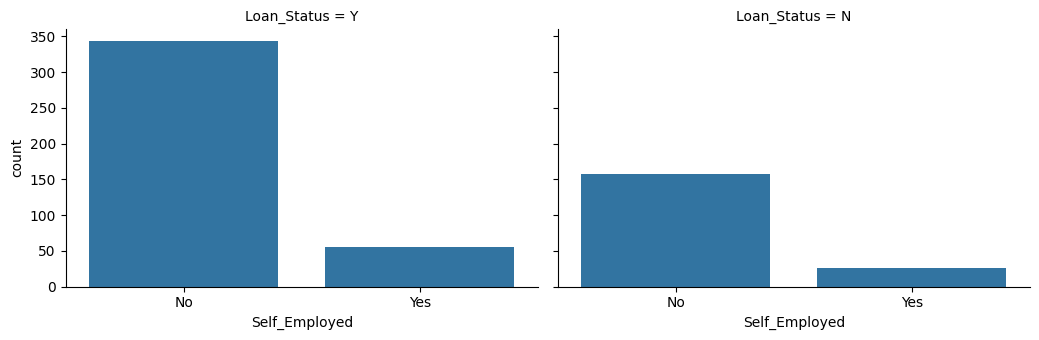

In [ ]:
grid = sns.FacetGrid(data=df_train, col="Loan_Status", height=3.5, aspect=1.5)

grid.map_dataframe(sns.countplot, x="Self_Employed")

plt.show()


#### Observation
- We can say, Self Employed people got more loan than others

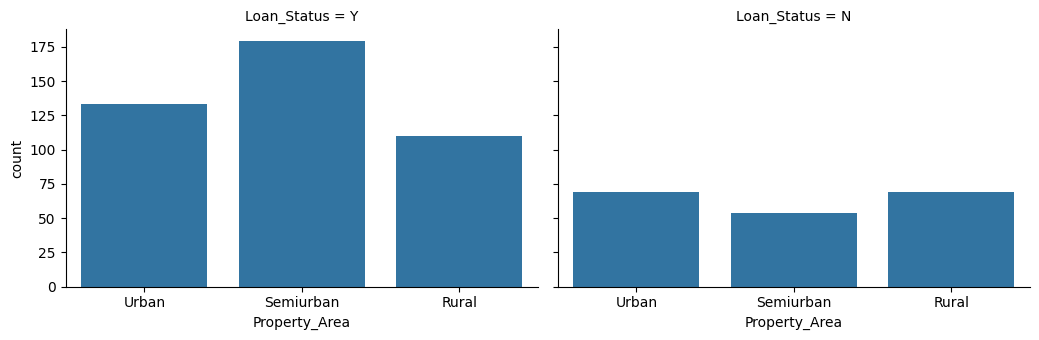

In [ ]:
grid = sns.FacetGrid(data=df_train, col="Loan_Status", height=3.5, aspect=1.5)

grid.map_dataframe(sns.countplot, x="Property_Area")

plt.show()

#### Observation
- Here Semiurban Property Area get more loans in comparision to other area

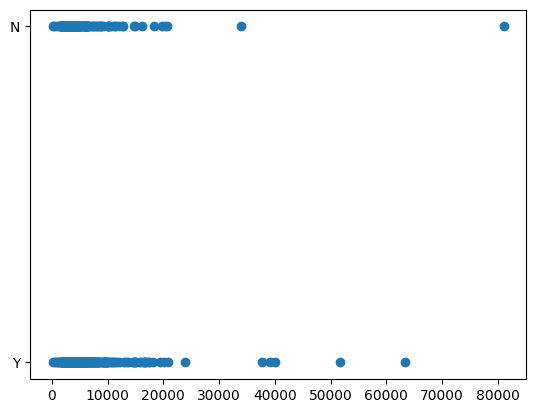

In [ ]:
plt.scatter(df_train['ApplicantIncome'],df_train['Loan_Status'])
plt.show()

# No Pattern

Univariate Analysis

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Education,0
Loan_ID,0
CoapplicantIncome,0


In [ ]:
## Dropping Loan Id
df_train.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
## Separating the categorical and numerical data
cat_data = []
num_data = []

for name,dtype in enumerate(df_train.dtypes):
    if dtype == object:
        cat_data.append(df_train.iloc[:,name])
    else:
        num_data.append(df_train.iloc[:,name])

In [ ]:
cat_data = pd.DataFrame(cat_data).T
num_data = pd.DataFrame(num_data).T

In [ ]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0
...,...,...,...,...
609,2900.0,0.0,71.0,360.0
610,4106.0,0.0,40.0,180.0
611,8072.0,240.0,253.0,360.0
612,7583.0,0.0,187.0,360.0


In [ ]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [ ]:
## Handling missing values in categorical data
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().sort_values(ascending=False)

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Credit_History,0
Property_Area,0
Loan_Status,0


In [ ]:
## Handling missing values in numerical data
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().sort_values(ascending=False)

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
## Categorical Data Preprocessing

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
target_values = {'Y':0,'N':1}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target = target.map(target_values)

In [ ]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [ ]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0
610,1,1,3,0,0,1,0
611,1,1,1,0,0,1,2
612,1,1,2,0,0,1,2


In [ ]:
df = pd.concat([cat_data,num_data,target],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,2900.0,0.0,71.0,360.0,0
610,1,1,3,0,0,1,0,4106.0,0.0,40.0,180.0,0
611,1,1,1,0,0,1,2,8072.0,240.0,253.0,360.0,0
612,1,1,2,0,0,1,2,7583.0,0.0,187.0,360.0,0


# Data Splitting

In [ ]:
X = pd.concat([num_data,cat_data],axis=1)
y = target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
print('X_test shape',X_test.shape)
print('X_train shape',X_train.shape)
print('y_test shape',y_test.shape)
print('y_train shape',y_train.shape)

X_test shape (123, 11)
X_train shape (491, 11)
y_test shape (123,)
y_train shape (491,)


# Model Implementation and Evaluation

In [ ]:
## Various Machine Learning Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

In [ ]:
from sklearn.metrics import precision_score , recall_score, f1_score, log_loss, accuracy_score
def loss(y_true,y_pred,retu=False):
    pre = precision_score(y_true,y_pred)
    rec = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    loss = log_loss(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)

    if retu:
        return pre, rec, f1, loss, acc
    else:
        print(' pre: %.3f\n rec: %.3f\n f1: %.3f\n loss: %.3f\n acc: %.3f'% (pre,rec,f1,loss,acc))

In [ ]:
def train_eval(models,X,y):
    for name, model in models.items():
        print(name, ":")
        model.fit(X,y)
        loss(y,model.predict(X))
        print('-'*10)


train_eval(models,X_train,y_train)

LogisticRegression :
 pre: 0.917
 rec: 0.437
 f1: 0.592
 loss: 6.680
 acc: 0.815
----------
KNeighborsClassifier :
 pre: 0.611
 rec: 0.364
 f1: 0.456
 loss: 9.617
 acc: 0.733
----------
SVC :
 pre: 1.000
 rec: 0.007
 f1: 0.013
 loss: 11.011
 acc: 0.695
----------
DecisionTreeClassifier :
 pre: 0.929
 rec: 0.430
 f1: 0.588
 loss: 6.680
 acc: 0.815
----------


In [ ]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# For validation of program

We have done the training and testing of our model with training data `df_train`. Now we have process the validation data and user input for prediction.

In [ ]:
df_test.drop('Loan_ID',axis=1,inplace=True)
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


***list of preprocessing we have used***
- remove duplicate
- seprate handle the missing value
- transform the cat_data
- --:transform target data
- concat them

In [ ]:
# Handling duplicate values
df_test.duplicated().sum()

np.int64(1)

In [ ]:
## Changing the data type of `Credit History`
df_test['Credit_History'] = df_test['Credit_History'].astype('O')

In [ ]:
## Seprating categorical and numerical data
Tcat_data = []
Tnum_data = []

for name, dtype in enumerate(df_test.dtypes):
    if dtype == object:
        Tcat_data.append(df_test.iloc[:,name])
    else:
        Tnum_data.append(df_test.iloc[:,name])

Tcat_data = pd.DataFrame(Tcat_data).T
Tnum_data = pd.DataFrame(Tnum_data).T

In [ ]:
## Handling missing value in categorical data
Tcat_data = Tcat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
Tcat_data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Credit_History,0
Property_Area,0


In [ ]:
## Handling missing value in numerical data
Tnum_data.fillna(method='bfill',inplace=True)
Tnum_data.isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
Tcat_data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Urban
2,Male,Yes,2,Graduate,No,1.0,Urban
3,Male,Yes,2,Graduate,No,1.0,Urban
4,Male,No,0,Not Graduate,No,1.0,Urban
...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,1.0,Urban
363,Male,Yes,0,Graduate,No,1.0,Urban
364,Male,No,0,Graduate,No,1.0,Semiurban
365,Male,Yes,0,Graduate,No,1.0,Rural


In [ ]:
## Transforming the categorical data storing into other dataframe
Transform_cat_data = pd.DataFrame()
for data in Tcat_data:
    Transform_cat_data[data] = le.fit_transform(Tcat_data[data])

In [ ]:
## Createing validation dataframe
X_valid = pd.concat([Tnum_data,Transform_cat_data],axis=1)

In [ ]:
## Predicting target with logisticRegression
predict = models['LogisticRegression'].predict(X_valid)

In [ ]:
output = pd.concat([Tnum_data,Tcat_data],axis=1)

In [ ]:
## Collecting all validating data into one dataframe
predict = pd.DataFrame(predict)
output = pd.concat([output,predict],axis=1)
output = output.rename({0:'Predicted'},axis='columns')

In [ ]:
output

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Predicted
0,5720.0,0.0,110.0,360.0,Male,Yes,0,Graduate,No,1.0,Urban,0
1,3076.0,1500.0,126.0,360.0,Male,Yes,1,Graduate,No,1.0,Urban,0
2,5000.0,1800.0,208.0,360.0,Male,Yes,2,Graduate,No,1.0,Urban,0
3,2340.0,2546.0,100.0,360.0,Male,Yes,2,Graduate,No,1.0,Urban,0
4,3276.0,0.0,78.0,360.0,Male,No,0,Not Graduate,No,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,Male,Yes,3+,Not Graduate,Yes,1.0,Urban,0
363,4158.0,709.0,115.0,360.0,Male,Yes,0,Graduate,No,1.0,Urban,0
364,3250.0,1993.0,126.0,360.0,Male,No,0,Graduate,No,1.0,Semiurban,0
365,5000.0,2393.0,158.0,360.0,Male,Yes,0,Graduate,No,1.0,Rural,0


In [ ]:
import os

os.makedirs("Data", exist_ok=True)
output.to_csv("Data/output.csv", index=False)


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
joblib.dump(dt, "model.sav")



['model.sav']